In [1]:
#install and import dependencies

In [64]:
!pip install easyocr
!pip install imutils 
!pip install pytesseract

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no 

In [65]:
!pip install difPy 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/opt/homebrew/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [81]:
import cv2   # to perform tasks like face detection, objection tracking, landmark detection, and much more
from matplotlib import pyplot as plt
import numpy as np
import imutils   #image translation, rotation, resizing, skeletonization, or blur amount detection.
#import easyocr
import pytesseract
from difPy import dif  #searches images in two different folders and compares
import os    # to interact with the underlying operating system
import time

In [87]:
# Convertinf Video to Images
vidcap = cv2.VideoCapture('video3.mp4')
success,image = vidcap.read()
count = 1
while success:
  cv2.imwrite("./Extracted Images/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
#   print('Read a new frame: ', success)
  count += 1

In [88]:
# Removing duplicate frames from extractetd folder
search = dif("./Extracted Images")
for res in search.result:
    duplicates = search.result[res]['duplicates']
    for dup in duplicates:
        if os.path.exists(dup):
            os.remove(dup)

Found 23 images with one or more duplicate/similar images in 0.3758 seconds.


In [89]:
def convert_image_to_text(image_file):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    plt.show()

    #Apply filter and edges for localization
    bfilter = cv2.bilateralFilter(gray, 5, 20, 100) #Noise Reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
    plt.show()

    #Find Contours and Apply Mask
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #contours defined as line joining all the points along the boundary of an image that are having the same intensity
    contours = imutils.grab_contours(keypoints) 
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10 ]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 20, True)
        if len(approx) == 4:
            location = approx
            break
    
    # Masking define a small 'image piece' and use it to modify a larger image
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)
    
    
    # PLot only text
    (x, y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    img = gray[x1:x2+1, y1:y2+1]
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

    # Read text
    img = cv2.resize(img, None, fx=1.4, fy= 1.4, interpolation=cv2.INTER_CUBIC)
    
    img = cv2.medianBlur(img, 3)
  
    text = pytesseract.image_to_string(img, lang='eng', config='--psm 6')
    return text.strip()

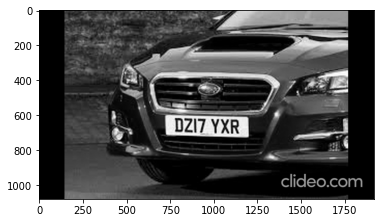

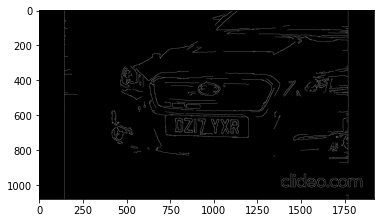

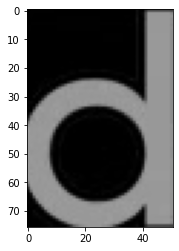

Found Text e


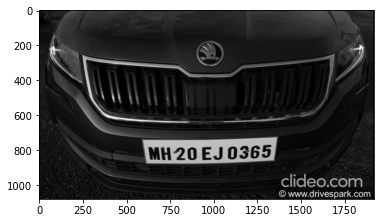

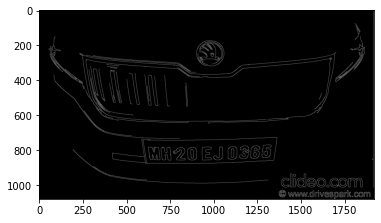

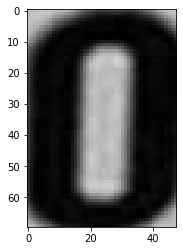

Found Text fj
“ 4


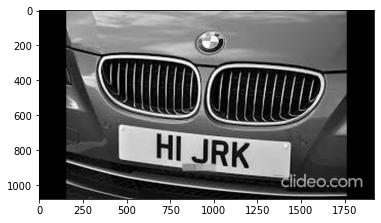

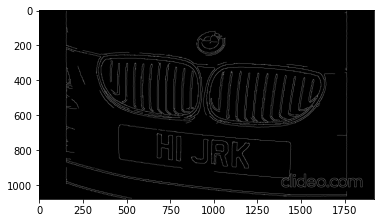

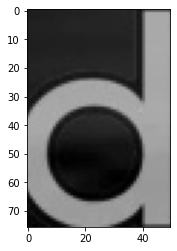

Found Text e


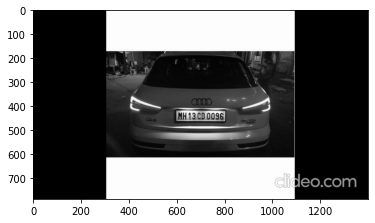

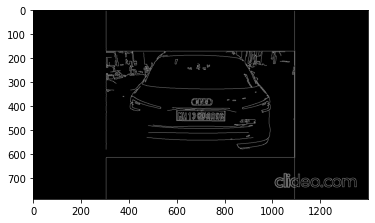

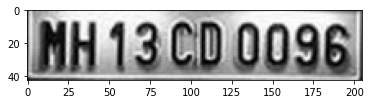

Found Text NH13CD 0096


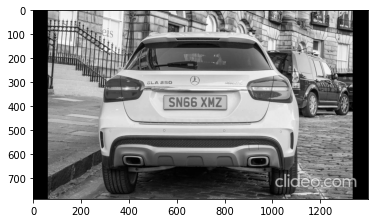

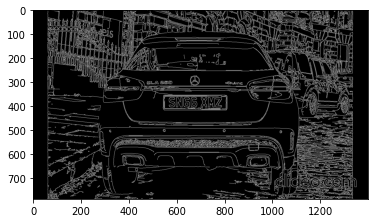

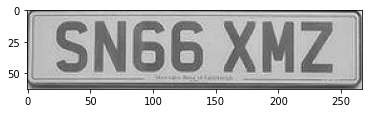

Found Text 


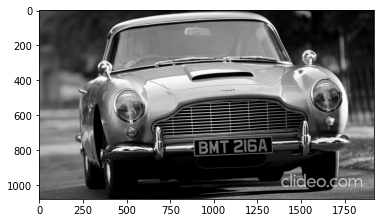

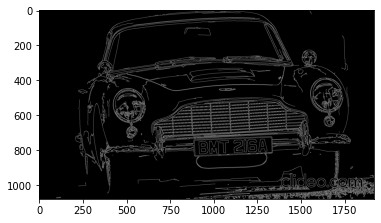

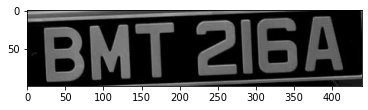

Found Text BMT 2el6A


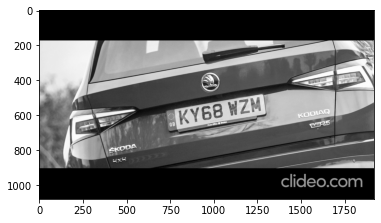

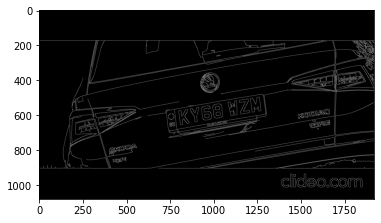

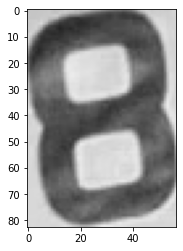

Found Text 


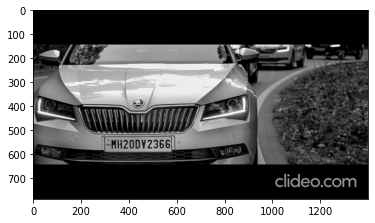

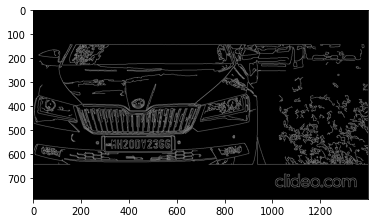

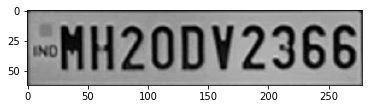

Found Text ~MH20DV¥2366


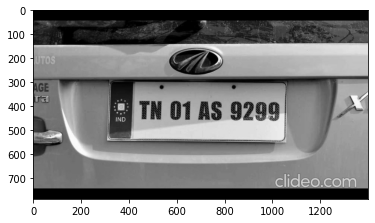

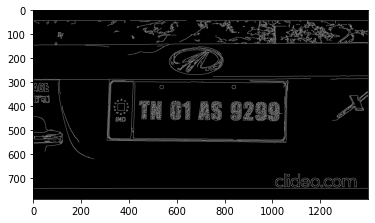

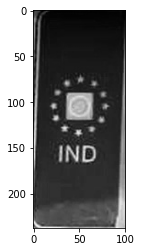

Found Text 


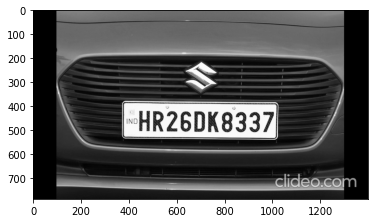

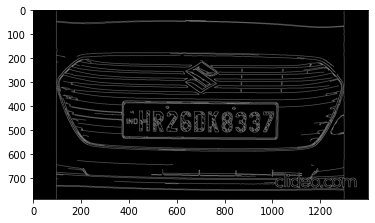

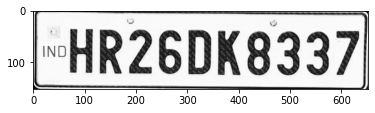

Found Text HR26DK8337|


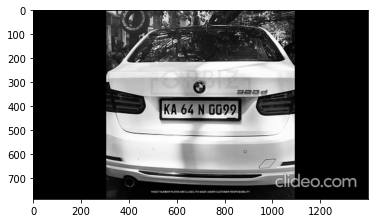

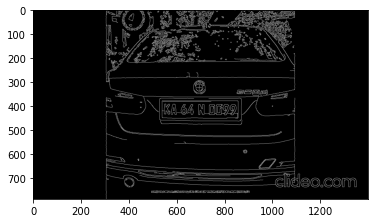

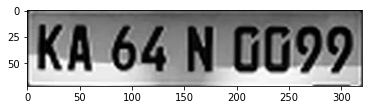

Found Text KA 64N G699
The Cars Entered are: ['e', 'fj\n“ 4', 'e', 'NH13CD 0096', '', 'BMT 2el6A', '', '~MH20DV¥2366', '', 'HR26DK8337|', 'KA 64N G699']


In [90]:
number_plate_text = []

for file in os.listdir('./Extracted Images'):
#     print(file)
    if '.jpg' in file:
        converted_text = convert_image_to_text("./Extracted Images/"+file)
        print("Found Text", converted_text)
        number_plate_text.append(converted_text)
    
print("The Cars Entered are:", number_plate_text)

In [91]:
valid_cars = ['KA 64N G699','NH13CD 0096']

for car in number_plate_text:
    if car in valid_cars:
        print(car+ " is a valid car and it can pass the gate. OPEN THE GARRAGE. \n")
    else:
        print(car+ "Car in invalid so cant open the garage")
    

eCar in invalid so cant open the garage
fj
“ 4Car in invalid so cant open the garage
eCar in invalid so cant open the garage
NH13CD 0096 is a valid car and it can pass the gate. OPEN THE GARRAGE. 

Car in invalid so cant open the garage
BMT 2el6ACar in invalid so cant open the garage
Car in invalid so cant open the garage
~MH20DV¥2366Car in invalid so cant open the garage
Car in invalid so cant open the garage
HR26DK8337|Car in invalid so cant open the garage
KA 64N G699 is a valid car and it can pass the gate. OPEN THE GARRAGE. 

